# Lab: using clustering to find best store locations

Imagine the following situation:<br>
You own a pizza chain, and you collected data about pizza deliveries in a certain neighborhood. The data contains a coordinate of each delivery as a pair *(Latitude, Longitude)*. You do not have any stores in this neighborhood, and driving there each time is too expensive (especially with current gas prices). So you decide to open $K$ new stores in this area. The task is, based on the frequent delivery data, determine the best locations for the new stores.

You need to perform the $K$-means clustering of delivery locations, and otput the best location for $K$ new stores. How would you choose the location of the store within each cluster that minimizes the overall distance between the store and each delivery address? __Explain your idea in a separate cell below.__

To minimize the overall distance between the store and each delivery address, the centroid of the cluster should be used. The centroid is the location that should minimize the distance between all delivery locations in a cluster, since the centroid is the balancing point between every point in the cluster

The data is 2-dimensional and it is easy to plot it to see if the locations of new stores make sense.

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np

The data is a real data collected by [this person](https://github.com/angelddaz) while they were working as a pizza delivery driver. The file `pizza_delivery_locations.csv` is a projection of the original data and contains only *(Latitude, Longitude)* of each delivery address. 

In [159]:
data_file = "pizza_delivery_locations.csv"

In [160]:
data = pd.read_csv(data_file)
print(data.columns)
len(data)

# convert dataframe to a 2D numpy array - it is easier to work with it
data = data.to_numpy()

Index(['Latitude', 'Longitude'], dtype='object')


## Task 1.

Use $K$-means clustering algorithm to find the best locations for new pizza stores for $K$=2, $K$=3 and $K$=4. The answers should be represented as lists of *(Latitide,Longitude)* tuples for each value of $K$.

You can use the custom code from the k-means demo, or you can implement your own clustering algorithm. What distance metric is the most appropriate for this situation? **I think the manhattan distance metirc makes the most sense here since we are considering streets and blocks as the way to travel through the graph. These best fit with a manhattan distance metric, which were made for these types of things**

In [161]:
# functions from kmeans_clustering_demo

def manhattan(v1,v2):
    res=0
    dimensions=min(len(v1),len(v2))

    for i in range(dimensions):
        res+=abs(v1[i]-v2[i])

    return res

import random

# k-means clustering
def kcluster(rows,distance,k):
    # Determine the minimum and maximum values for each point
    ranges=[(min([row[i] for row in rows]),max([row[i] for row in rows]))
    for i in range(len(rows[0]))]

    # Create k randomly placed centroids
    clusters=[[random.random()*(ranges[i][1]-ranges[i][0])+ranges[i][0]
                            for i in range(len(rows[0]))] for j in range(k)]
  
    lastmatches=None
    bestmatches = None

    for t in range(100):
        print ('Iteration %d' % t)
        bestmatches=[[] for i in range(k)]
    
        # Find which centroid is the closest for each row
        for j in range(len(rows)):
            row=rows[j]
            bestmatch=0
            for i in range(k):
                d=distance(clusters[i],row)
                if d<distance(clusters[bestmatch],row): bestmatch=i
            bestmatches[bestmatch].append(j)

        # If the results are the same as last time, this is complete
        if bestmatches==lastmatches: break
        lastmatches=bestmatches
    
        # Move the centroids to the average of the cluster members
        for i in range(k):
            avgs=[0.0]*len(rows[0])
            if len(bestmatches[i])>0:
                for rowid in bestmatches[i]:
                    for m in range(len(rows[rowid])):
                        avgs[m]+=rows[rowid][m]
                for j in range(len(avgs)):
                    avgs[j]/=len(bestmatches[i])
                clusters[i]=avgs
      
    return bestmatches

# clustering code for 2,3 and 4 clusters
K = 2
clust2=kcluster(data,distance=manhattan,k=K)

K = 3
clust3=kcluster(data,distance=manhattan,k=K)

K = 4
clust4=kcluster(data,distance=manhattan,k=K)


Iteration 0
Iteration 1
Iteration 2
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 0
Iteration 1
Iteration 2
Iteration 3


In [162]:
# finding the centroids, which should be the best place to place a new store
def find_centroids(clust):
    centroids = []
    for cluster in clust:
        # For each cluster, find the centroid
        lat = 0
        long = 0
        points = 0
        # keep track of lat and long and find averages for centroid
        for i in range(len(cluster)):
            lat += data[cluster[i]][0]
            long += data[cluster[i]][1]
            points += 1
        if points != 0:
            lat = lat / points
            long = long / points
        centroids.append( (lat, long) )
    return centroids

# store centroids as tuples
store_locs_2 = find_centroids(clust2)
store_locs_3 = find_centroids(clust3)
store_locs_4 = find_centroids(clust4)

## Task 2
Visualize clusters by plotting each data point and coloring it with a different color corresponding to the cluster to which it belongs. Also plot the locations of new stores for each value of $K$. Some examples of the final visualizations are given below.

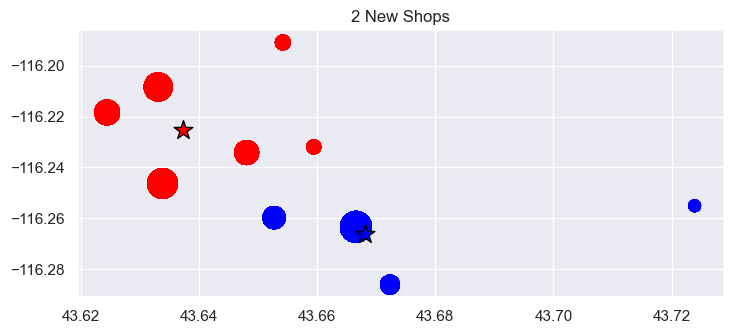

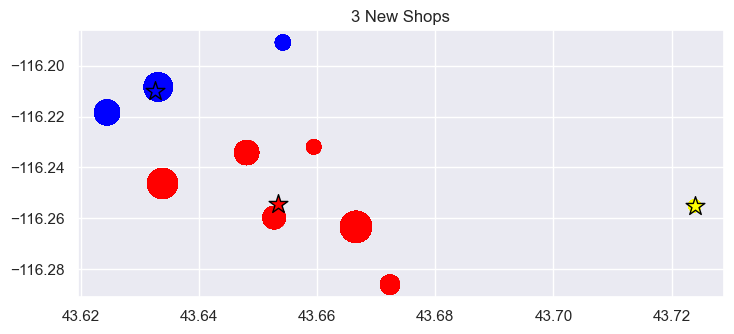

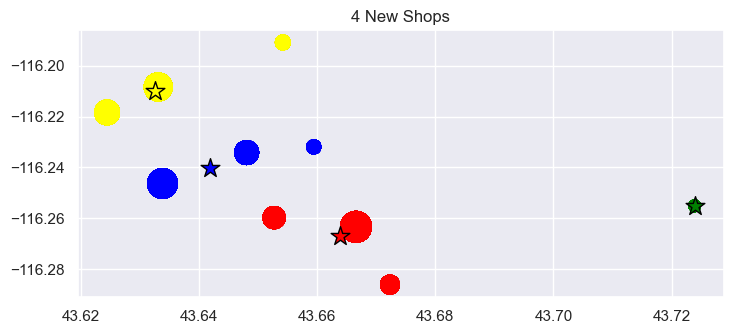

In [163]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# change integers to colors (up to 4 clusters)
color_map = {0 : 'blue', 1 : 'red', 2 : 'yellow', 3 : 'green'}

def plot_clusters(clust, centroids, plot_title):
    colors = []

    # populate color array for each data point
    for i in range(len(data[:,0])):
        for clust_num in range(len(clust)):
            if i in clust[clust_num]:
                colors.append(clust_num)

    # map color integers to color names
    for i in range(len(colors)):
        colors[i] = color_map[colors[i]]

    # easier to look at than data[:,0]
    x = data[:,0].tolist()
    y = data[:,1].tolist()

    # make list of counts to weight the data point size
    unique_counts = np.unique(x, return_counts=True)
    sizes = []

    # use sizes array to map data points to their respective counts
    for i in range(len(x)):
        for j in range(len(unique_counts[0])):
            if x[i] == unique_counts[0][j]:
                sizes.append(unique_counts[1][j] * 2)

    # plot the main data with cluster colors
    plt.scatter(x, y, s = sizes, c=colors)

    # plot centroids
    centroid_num = 0
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], c = color_map[centroid_num],marker='*', s=200, edgecolors='black')
        centroid_num += 1


    # add a title and show the plot
    plt.title(plot_title)
    plt.show()

plot_clusters(clust2, store_locs_2, "2 New Shops")
plot_clusters(clust3, store_locs_3, "3 New Shops")
plot_clusters(clust4, store_locs_4, "4 New Shops")

# Notes on Plots
* The stars represent the new pizza shops to be built

As seen in the plots above, each delivery location has a different size depending on how many times it was visited. I added this to make more sense of where the new pizza shops are placed, since they gravitate towards the larger points. When seeing the differences in the sizes of dots, the locations of the new pizza shops make a lot more sense. Also, this algorithm will produce different pizza shop locations possibly every time it runs, due to the random nature of choosing starting locations.

## Examples of cluster visualization in 2D

Plotting original data:
    
<img src="clusters.png">

Plotting clusters with store locations
<img src="locations.png">

Copyright &copy; 2024 Marina Barsky. All rights reserved.